#  Level 1: Basic Data Handling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Load dataset: Pandas ka use karke CSV load karo aur first 5 rows print karo.

In [2]:
df=pd.read_csv(r"C:\Users\evilk\Downloads\archive\house_prices.csv")
df.head(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


### Dataset Overview:

    Total rows & columns print karo.

In [3]:
row,cols=df.shape
print(f"Rows {row}")
print(f"Cols {cols}")

Rows 187531
Cols 21


Data types aur missing values check karo (df.info() aur df.isnull().sum()).

In [4]:
print(df.info())
print("================================")
print(df['Price (in rupees)'].isnull().sum())
print(df['Amount(in rupees)'].isnull().sum())
print(df['Carpet Area'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

Missing values ko handle karo (Price (in rupees), Carpet Area, Bathroom).

In [5]:
df['Price (in rupees)']=df['Price (in rupees)'].fillna(df['Price (in rupees)'].mean())
df['Carpet Area']=df['Carpet Area'].fillna(0)
df['Carpet Area'] = (
    df['Carpet Area']
    .astype(str)  # Convert NaN to string so str operations don't fail
    .str.replace(',', '', regex=True)  # Remove commas
    .str.extract(r'([\d.]+)')  # Extract numeric values (including decimals)
    .astype(float)  # Convert to float
)
df['Bathroom']=df['Bathroom'].fillna(0)


Price (in rupees) ka histogram plot karo using Seaborn.


In [6]:
##sns.histplot(df["Price (in rupees)"])

In [7]:
print("Mean",df['Price (in rupees)'].mean())
df_mean=np.mean(df['Price (in rupees)'])
print(df_mean)
df_median=np.median(df['Price (in rupees)'])
print(df_median)
df_std=np.std(df['Price (in rupees)'])
print(df_std)

Mean 7583.771884897505
7583.771884897505
6499.0
25926.8476491065


Kaunsi location me average house price sabse jyada hai?

location
agra             14353.396799
ahmadnagar        4478.251459
ahmedabad         5554.675021
allahabad         8616.334011
aurangabad        4929.181751
                     ...     
varanasi          6515.249121
vijayawada        4586.514892
visakhapatnam     5238.340970
vrindavan         5385.862865
zirakpur          4342.257801
Name: Price (in rupees), Length: 81, dtype: float64


<Axes: xlabel='location', ylabel='Price (in rupees)'>

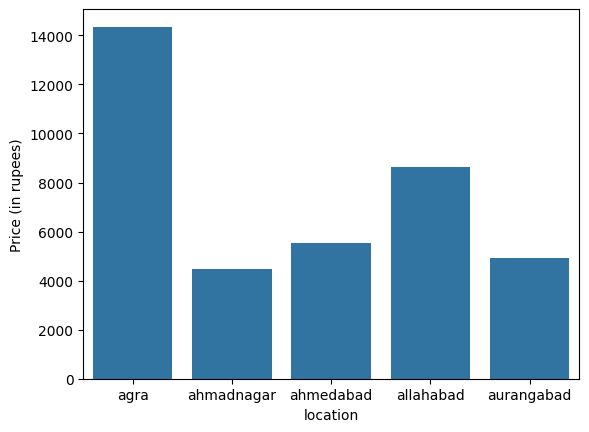

In [8]:
locAvgPri = df.groupby('location')['Price (in rupees)'].mean()
print(locAvgPri)
sns.barplot(locAvgPri.head(5))

Carpet Area aur Price (in rupees) ka scatterplot banao.


<Axes: xlabel='Carpet Area', ylabel='Price (in rupees)'>

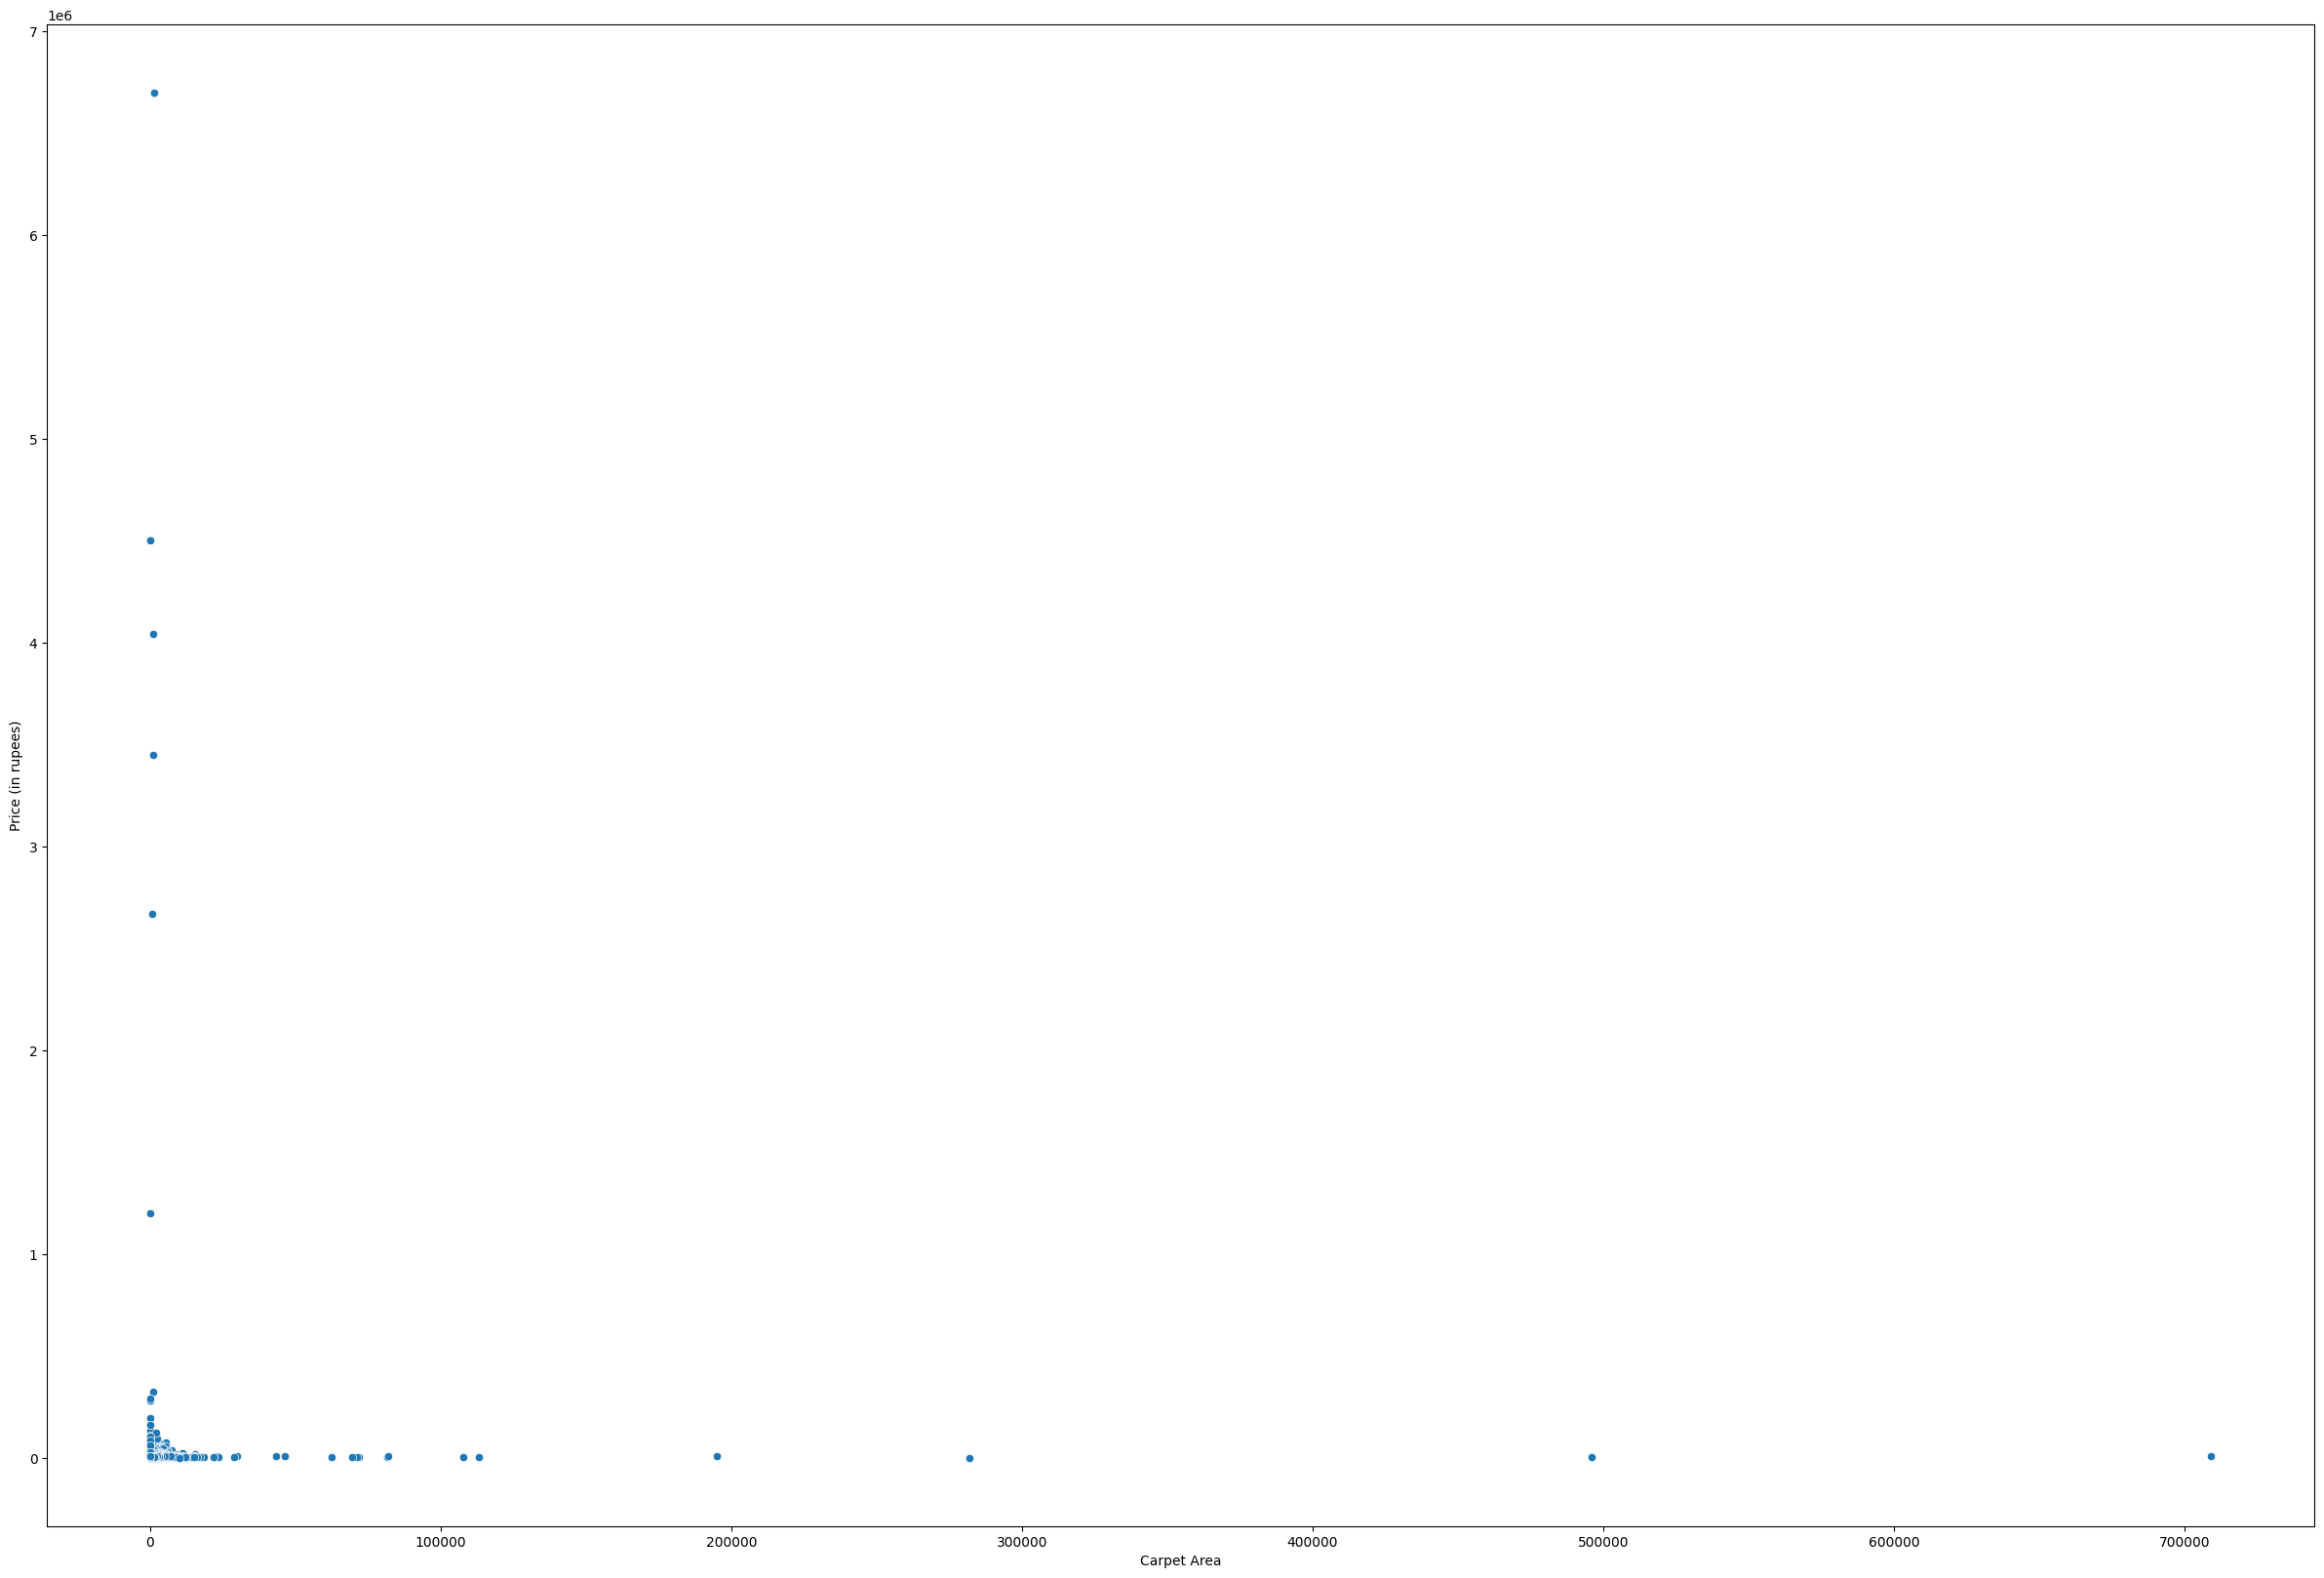

In [9]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='Carpet Area',y='Price (in rupees)',data=df)

Q NumPy aur Pandas ka corr() function use karke correlation nikal ke dekho.

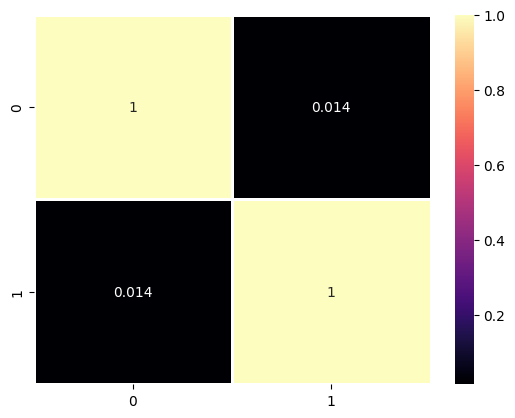

In [10]:
matrix=np.corrcoef(df['Price (in rupees)'],df['Carpet Area'])
sns.heatmap(matrix,annot=True,cmap='magma',linewidths=2)
plt.show()

### Furnishing Impact on Price:

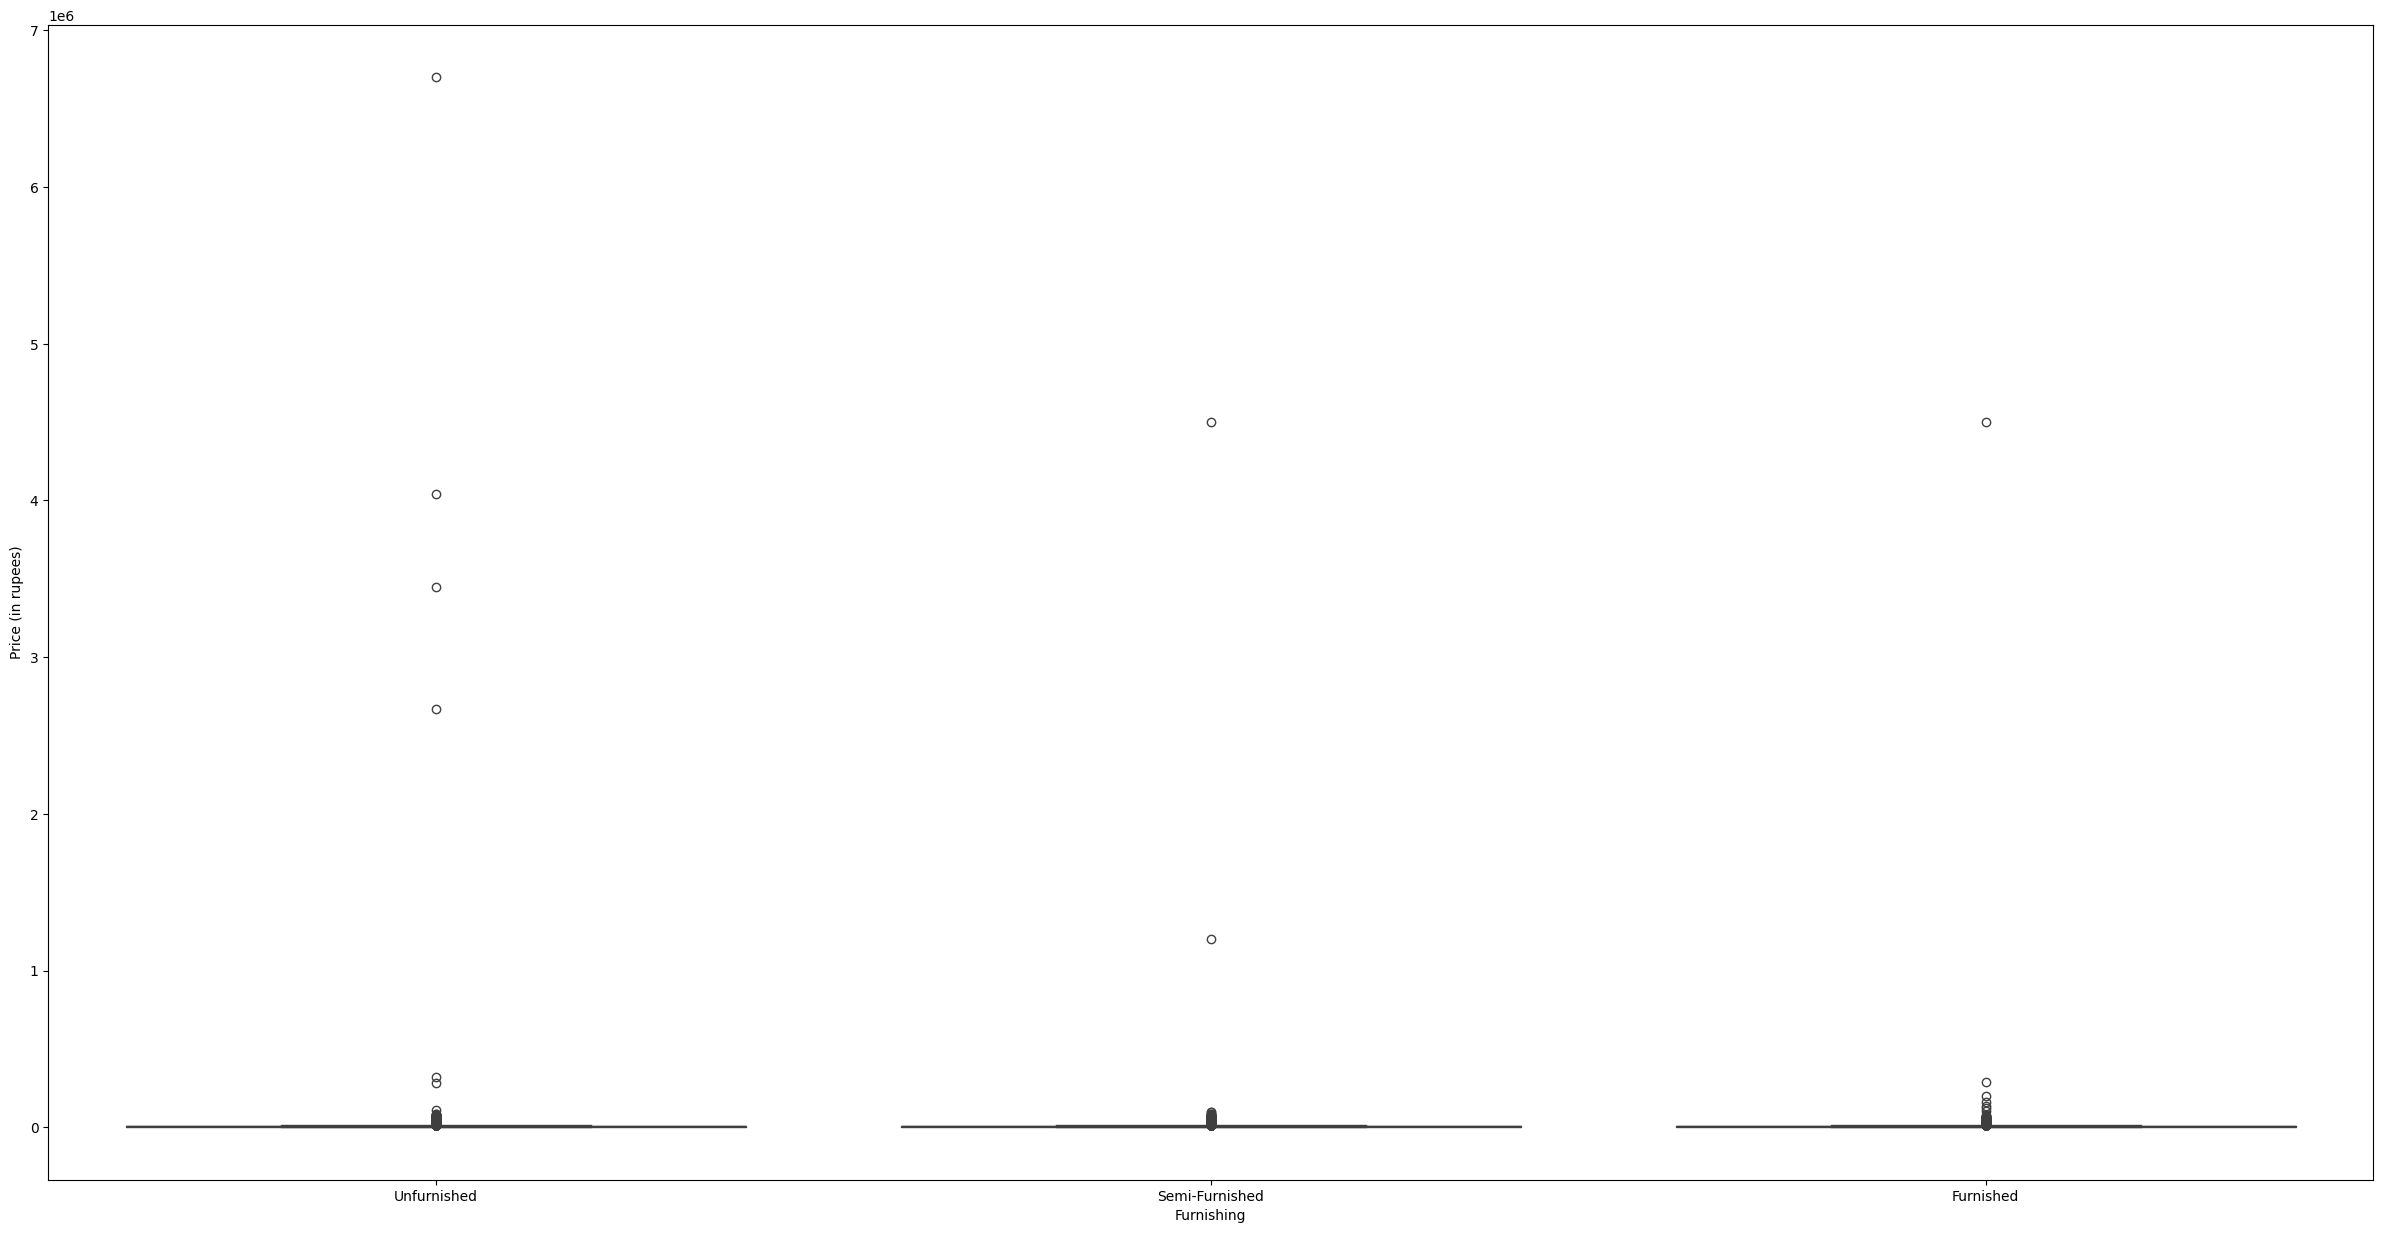

In [11]:
plt.figure(figsize=(30,15))
sns.boxplot(x='Furnishing',y='Price (in rupees)',data=df)
plt.show()

Transaction Type Impact:

<Axes: xlabel='Transaction', ylabel='Price (in rupees)'>

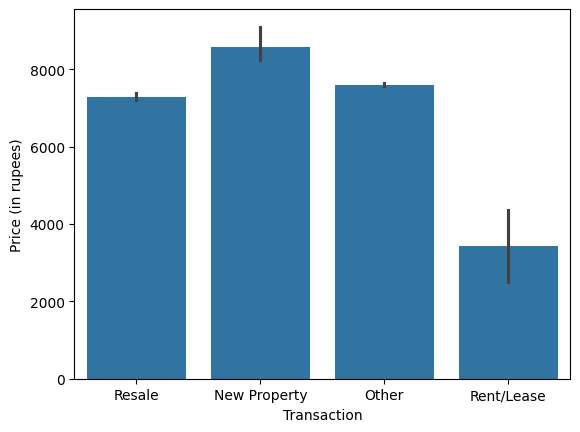

In [13]:
sns.barplot(x='Transaction',y='Price (in rupees)',data=df)